**Sentiment Analysis of Product Reviews using Naive Bayes**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Load the dataset
df = pd.read_csv("/content/1429_1.csv.zip")
df.head(5)

/tmp/ipython-input-760-534947479.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/1429_1.csv.zip")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
df.isnull().sum()

,0
id,0
name,6760
asins,2
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,39
reviews.dateAdded,10621
reviews.dateSeen,0


In [ ]:
df = df[['name', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.dateAdded', 'reviews.didPurchase', 'reviews.numHelpful']]
df = df.dropna(subset=['reviews.rating', 'reviews.text'])
df.reset_index(drop=True, inplace=True)

In [ ]:
#Create sentiment labels
def sentiment_label(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['reviews.rating'].apply(sentiment_label)


In [ ]:
# Balance the dataset
df_pos = df[df['Sentiment'] == 'positive']
df_neu = df[df['Sentiment'] == 'neutral']
df_neg = df[df['Sentiment'] == 'negative']

df_pos_upsampled = resample(df_pos, replace=True, n_samples=len(df_neg), random_state=42)
df_neu_upsampled = resample(df_neu, replace=True, n_samples=len(df_neg), random_state=42)

df = pd.concat([df_neg, df_pos_upsampled, df_neu_upsampled])
df.reset_index(drop=True, inplace=True)

#Add review length feature
df['review_length'] = df['reviews.text'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
df['review_length'] = pd.to_numeric(df['review_length'], errors='coerce')


In [ ]:
manual_data = pd.DataFrame({
    'reviews.text': [
        # 🔹 Positive (15)
        "Didn’t expect it to be this good",
        "Not bad at all, actually impressed",
        "Surprisingly decent for the price",
        "It’s better than I thought",
        "No complaints, quite satisfied",
        "Honestly, loved it more than I expected",
        "Nothing fancy, but does the job well",
        "Wasn’t sure at first, but I love it now",
        "Impressive for a budget product",
        "I would recommend it, no doubt",
        "This is not bad",
        "Surprisingly not bad at all",
        "It looked bad, but it's not bad",
        "Performance is not bad actually",
        "Not bad. Might buy again",

        # ⚪ Neutral (15)
        "It’s okay, not amazing, not bad",
        "Can’t complain, just average",
        "It does what it says, nothing more",
        "Serviceable, but that’s it",
        "Not much to say, it’s fine",
        "Just another product, nothing stands out",
        "Meh. Doesn’t excite, doesn’t disappoint",
        "Works, but I’m indifferent",
        "Neither happy nor unhappy",
        "Neutral experience overall",
        "Fine. Nothing special",
        "Mildly acceptable",
        "An average purchase",
        "Meant well, but just okay",
        "Expected something else but it’s alright",

        # 🔻 Negative (15)
        "Not what I expected, kind of disappointed",
        "Looks okay but performs poorly",
        "I didn’t like it, but it wasn’t the worst",
        "Was hoping for more, fell flat",
        "Feels cheap and unreliable",
        "Not terrible, but not worth it",
        "Mediocre at best",
        "Expected better quality",
        "Too many issues for the price",
        "Doesn't meet the description",
        "This is not good",
        "It's not really good honestly",
        "I expected it to be good. It's not",
        "The design is not good",
        "Not good. Wouldn’t recommend"
    ],
    'reviews.rating': [
        # Positive
        5, 4, 4, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4, 4, 4,
        # Neutral
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        # Negative
        2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1
    ]
})


manual_data['Sentiment'] = manual_data['reviews.rating'].apply(label_sentiment)
manual_data['review_length'] = manual_data['reviews.text'].apply(lambda x: len(str(x).split()))
manual_data['clean_review'] = manual_data['reviews.text'].apply(clean_text)
manual_data['clean_review'] = manual_data['clean_review'].apply(handle_negation)

# Merge with your main dataset
df_updated = pd.concat([df, manual_data], ignore_index=True)



In [ ]:
#Clean review text: tokenization,stopwords removal & stemming
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - set(['not', 'no', "don't"])

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text)).lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['clean_review'] = df['reviews.text'].apply(clean_text)


/tmp/ipython-input-768-3747670556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=df, palette='coolwarm')


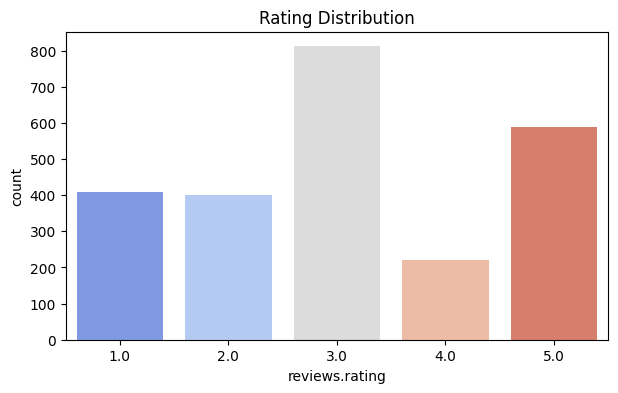

In [ ]:
# Rating distribution
plt.figure(figsize=(7,4))
sns.countplot(x='reviews.rating', data=df, palette='coolwarm')
plt.title('Rating Distribution')
plt.show()

/tmp/ipython-input-769-3327885901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')


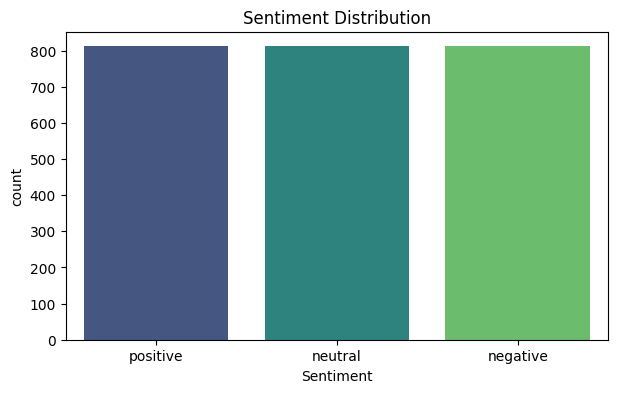

In [ ]:
# Sentiment distribution
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

/tmp/ipython-input-770-3999348375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='review_length', data=df, palette='Set2')


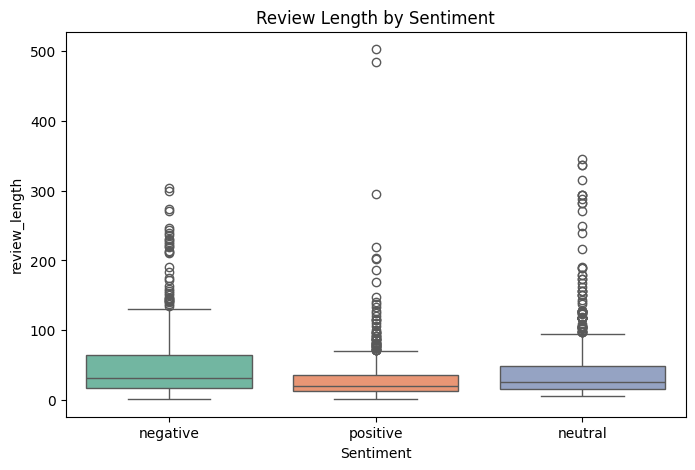

In [ ]:
# Review length by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='Sentiment', y='review_length', data=df, palette='Set2')
plt.title('Review Length by Sentiment')
plt.show()

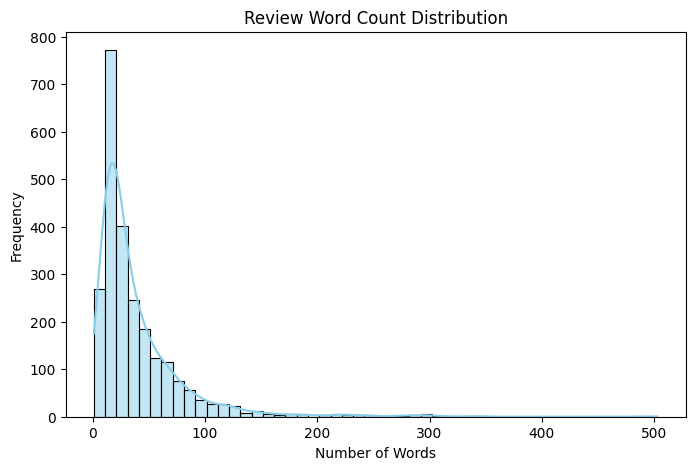

In [ ]:
# Review length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Review Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


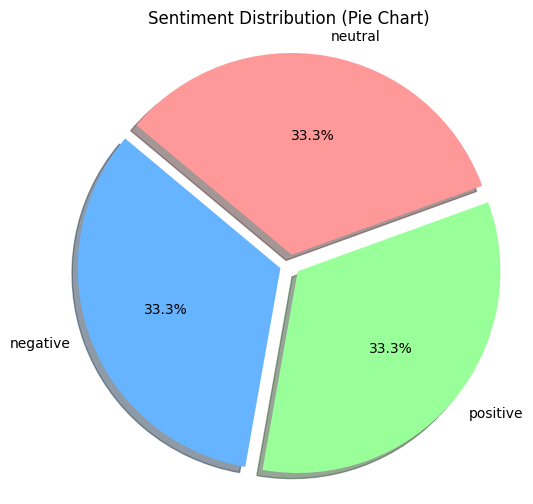

In [ ]:
# Pie Chart: Sentiment Distribution
plt.figure(figsize=(6,6))
sentiment_counts = df['Sentiment'].value_counts()
colors = ['#66b3ff','#99ff99','#ff9999']
plt.pie( sentiment_counts,labels=sentiment_counts.index,autopct='%1.1f%%',startangle=140,colors=colors,explode=(0.05, 0.05, 0.05),shadow=True)
plt.title('Sentiment Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


In [ ]:
#negation handling
def handle_negation(text):
    words = text.split()
    negation = {"not", "no", "never", "n't"}
    transformed = []
    negate = False
    for word in words:
        if word in negation:
            negate = True
        elif negate:
            transformed.append("NOT_" + word)
            negate = False
        else:
            transformed.append(word)
    return " ".join(transformed)


df['clean_review'] = df['clean_review'].apply(handle_negation)
extra_reviews['clean_review'] = extra_reviews['clean_review'].apply(handle_negation)


In [ ]:
#Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=8000)
X = vectorizer.fit_transform(df['clean_review']).toarray()

y = df['Sentiment']

In [ ]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#Train Naive Bayes Classifier
model = MultinomialNB(alpha=0.25)
model.fit(X_train, y_train)



MultinomialNB(alpha=0.25)

In [ ]:
#Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report (Focus on Precision & Recall):\n")
print(classification_report(y_test, y_pred, digits=3))


Accuracy: 0.6905737704918032

Classification Report (Focus on Precision & Recall):

              precision    recall  f1-score   support

    negative      0.686     0.821     0.747       162
     neutral      0.711     0.423     0.531       163
    positive      0.685     0.828     0.750       163

    accuracy                          0.691       488
   macro avg      0.694     0.691     0.676       488
weighted avg      0.694     0.691     0.676       488



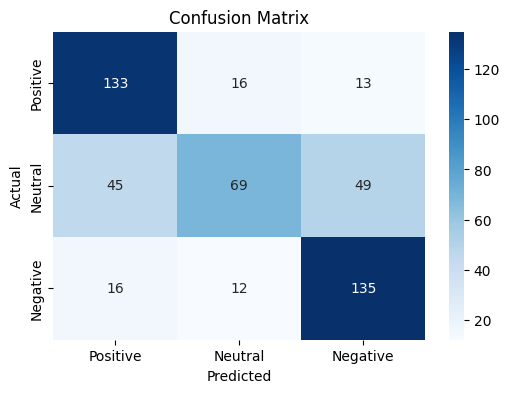

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Positive','Neutral','Negative'],
            yticklabels=['Positive','Neutral','Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

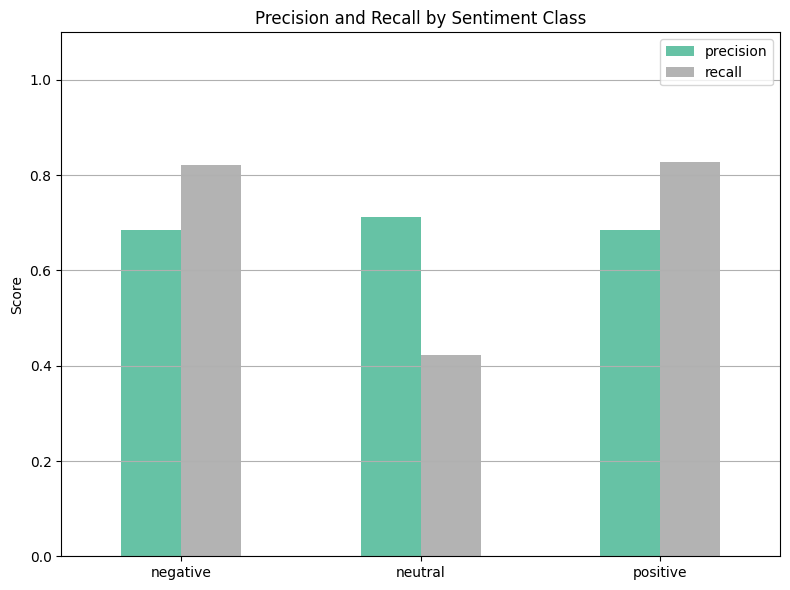

In [ ]:
# Visualizing Precision and Recall
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).drop(['accuracy', 'macro avg', 'weighted avg'], axis=1).T

report_df[['precision', 'recall']].plot(kind='bar', figsize=(8,6), colormap='Set2')
plt.title('Precision and Recall by Sentiment Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [ ]:
#Predict Sentiment from Custom Review
def predict_sentiment(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned]).toarray()
    prediction = model.predict(vector)
    return prediction[0]

example = "this is not good"
print(f"\nExample Review: {example}")
print("Predicted Sentiment:", predict_sentiment(example))




Example Review: this is not good
Predicted Sentiment: positive


In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, "nb_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']